In [2]:
#import the necessary packages 
import tensorflow as tf
from tensorflow.keras import layers,models,datasets
import matplotlib.pyplot as plt


In [5]:
#load the dataset and normalize the datasets
(train_images,train_labels),(test_images,test_labels) =datasets.cifar10.load_data()
(train_images,test_images)=train_images/255.0,test_images/255.0


In [7]:
model=models.Sequential([
    #first layer
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    #second layer
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    
    #third layer
    layers.Conv2D(64,(3,3),activation='relu'),
    #flatten the data and add a dense layer
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

c:\Users\skshi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
#compile the model
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history=model.fit(train_images,train_labels,epochs=10,
                  validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5942 - loss: 1.1525 - val_accuracy: 0.6241 - val_loss: 1.0607
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6654 - loss: 0.9587 - val_accuracy: 0.6788 - val_loss: 0.9217
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6973 - loss: 0.8631 - val_accuracy: 0.7002 - val_loss: 0.8731
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7307 - loss: 0.7689 - val_accuracy: 0.6971 - val_loss: 0.8778
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7542 - loss: 0.6994 - val_accuracy: 0.7143 - val_loss: 0.8423
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7682 - loss: 0.6622 - val_accuracy: 0.7044 - val_loss: 0.8664
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7880 - loss: 0.6076 - val_accuracy: 0.7146 - val_loss: 0.8648
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8036 - loss: 0.55

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7198 - loss: 0.8910
Test accuracy: 0.7163


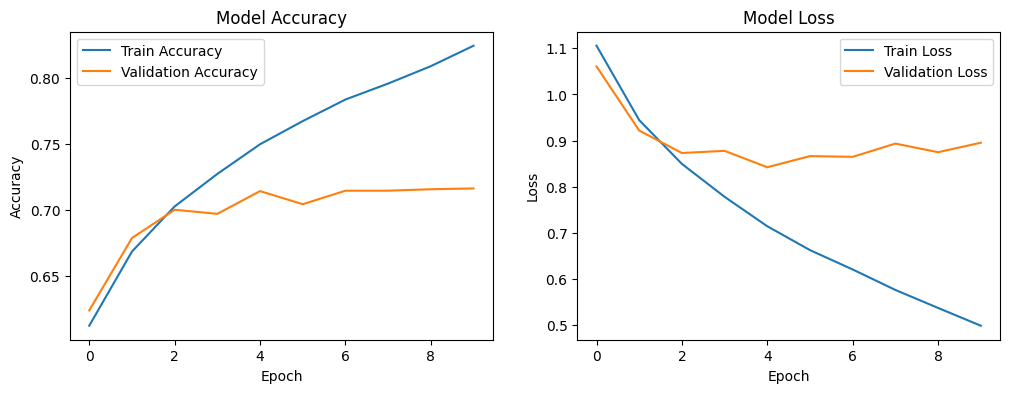

In [11]:
# d. Estimating the model’s performance
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


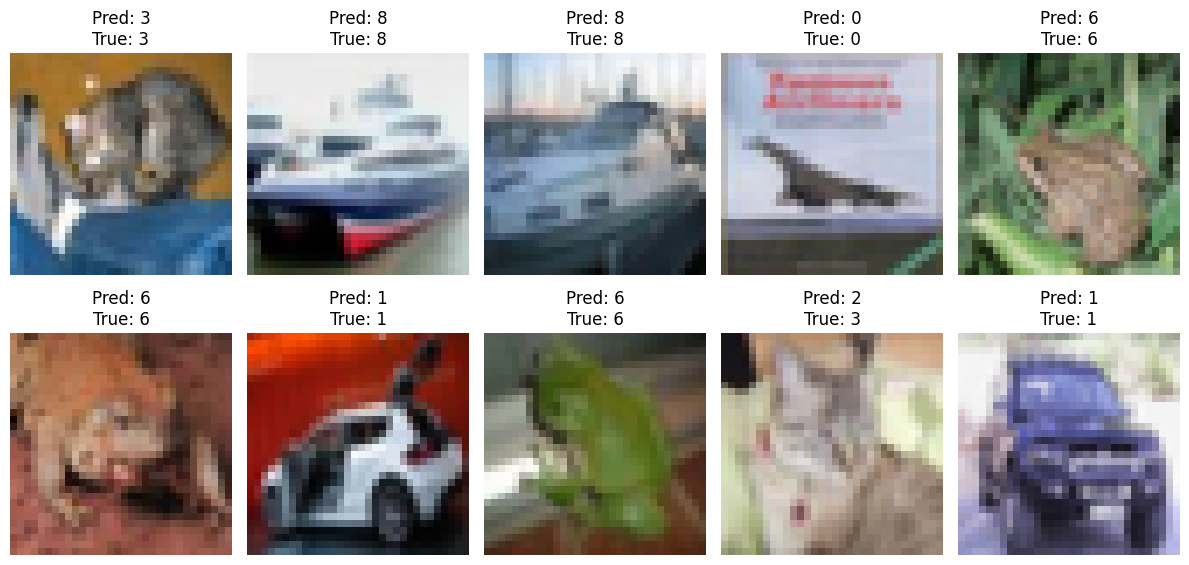

In [12]:
# e. Making predictions on the test images
predictions = model.predict(test_images)

# f. Display a few test images with their predicted and true labels
num_images_to_display = 10
plt.figure(figsize=(12, 6))
for i in range(num_images_to_display):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i])  # Display the image
    plt.title(f"Pred: {predictions[i].argmax()}\nTrue: {test_labels[i][0]}")
    plt.axis('off')  # Hide axes
plt.tight_layout()
plt.show()

